# Student Performance Regression and Classification Tree, RFC, RFR Predictor 

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("student-por.csv")

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df['school'].replace({"GP": 0, "MS": 1}, inplace = True)
df["school"] = df["school"].astype(int)

In [6]:
df.rename(columns = {"school": "school_ms"}, inplace = True)

In [7]:
df['address'].replace({"U": 0, "R": 1}, inplace = True)
df["address"] = df["address"].astype(int)

In [8]:
df.rename(columns = {"address": "address_1"}, inplace = True)

In [9]:
df['famsize'].replace({"GT3": 0, "LE3": 1}, inplace = True)
df["famsize"] = df["famsize"].astype(int)

In [10]:
df.rename(columns = {"famsize": "famsize_le3"}, inplace = True)

In [11]:
df['schoolsup'].replace({"no": 0, "yes": 1}, inplace = True)
df["schoolsup"] = df["schoolsup"].astype(int)

In [12]:
df.rename(columns = {"schoolsup": "schoolsup_yes"}, inplace = True)

In [13]:
df['famsup'].replace({"no": 0, "yes": 1}, inplace = True)
df["famsup"] = df["famsup"].astype(int)

In [14]:
df.rename(columns = {"famsup": "famsup_yes"}, inplace = True)

In [15]:
df['paid'].replace({"no": 0, "yes": 1}, inplace = True)
df["paid"] = df["paid"].astype(int)

In [16]:
df.rename(columns = {"paid": "paid_yes"}, inplace = True)

In [17]:
df['activities'].replace({"no": 0, "yes": 1}, inplace = True)
df["activities"] = df["activities"].astype(int)

In [18]:
df.rename(columns = {"activities": "activities_yes"}, inplace = True)

In [19]:
df['nursery'].replace({"yes": 0, "no": 1}, inplace = True)
df["nursery"] = df["nursery"].astype(int)

In [20]:
df.rename(columns = {"nursery": "nursery_no"}, inplace = True)

In [21]:
df['higher'].replace({"yes": 0, "no": 1}, inplace = True)
df["higher"] = df["higher"].astype(int)

In [22]:
df.rename(columns = {"higher": "higher_no"}, inplace = True)

In [23]:
df['romantic'].replace({"no": 0, "yes": 1}, inplace = True)
df["romantic"] = df["romantic"].astype(int)

In [24]:
df.rename(columns = {"romantic": "romantic_yes"}, inplace = True)

In [25]:
reason_dummy = pd.get_dummies(
             df["reason"], 
             prefix = "reason")
reason_dummy = reason_dummy.astype(int)

In [26]:
df = pd.concat([df, reason_dummy], axis = 1)

In [27]:
df.drop('reason', axis=1, inplace=True)

In [28]:
df["sex"].replace({"M": 0, "F": 1}, inplace = True)
df["sex"] = df["sex"].astype(int)

In [29]:
df.rename(columns = {"sex": "sex_fem"}, inplace = True)

In [30]:
guardian_dummy = pd.get_dummies(
             df["guardian"], 
             prefix = "guardian")
guardian_dummy = guardian_dummy.astype(int)

In [31]:
df = pd.concat([df, guardian_dummy], axis = 1)

In [32]:
df.drop('guardian', axis=1, inplace=True)

In [33]:
df["internet"].replace({"no": 0, "yes": 1}, inplace = True)
df["internet"] = df["internet"].astype(int)

In [34]:
df.rename(columns = {"internet": "internet_yes"}, inplace = True)

In [35]:
df["Pstatus"].replace({"T": 0, "A": 1}, inplace = True)
df["Pstatus"] = df["Pstatus"].astype(int)

In [36]:
df.rename(columns = {"Pstatus": "parents_apart"}, inplace = True)

In [37]:
dummies = pd.get_dummies(
             df[["Mjob", "Fjob"]], 
             prefix = ["mother", "father"])
dummies = dummies.astype(int)

In [38]:
df = pd.concat([df, dummies], axis = 1)

In [39]:
df.drop(['Mjob', 'Fjob'], axis =1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school_ms          649 non-null    int32
 1   sex_fem            649 non-null    int32
 2   age                649 non-null    int64
 3   address_1          649 non-null    int32
 4   famsize_le3        649 non-null    int32
 5   parents_apart      649 non-null    int32
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  failures           649 non-null    int64
 11  schoolsup_yes      649 non-null    int32
 12  famsup_yes         649 non-null    int32
 13  paid_yes           649 non-null    int32
 14  activities_yes     649 non-null    int32
 15  nursery_no         649 non-null    int32
 16  higher_no          649 non-null    int32
 17  internet_yes    

## We want to build a classification tree first

In [41]:
df_class = df.copy()

In [42]:
df_class["G3"].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

we will use the six-point grading scheme used for Academic grading in Portugal to create our different classes for the G3 column. Referring to the table, we see the following:

In [43]:
# Creating a new column
df_class["G3_qual"] = pd.Series(dtype = "object")

In [44]:
df_class["G3_qual"].mask(df_class["G3"] <= 3.4, "Poor", inplace = True)

In [45]:
df_class["G3_qual"].mask(
       (df_class["G3"] >= 3.5) & (df_class["G3"] <= 9.4), 
       "Weak", 
       inplace = True)

In [46]:
df_class["G3_qual"].mask(
       (df_class["G3"] >= 9.5) & (df_class["G3"] <= 13.4), 
       "Sufficient", 
       inplace = True)

In [47]:
df_class["G3_qual"].mask(
       (df_class["G3"] >= 13.5) & (df_class["G3"] <= 15.4), 
       "Good", 
       inplace = True)

In [48]:
df_class["G3_qual"].mask(
       (df_class["G3"] >= 15.5) & (df_class["G3"] <= 17.4), 
       "Very Good", 
       inplace = True)

In [49]:
df_class["G3_qual"].mask(df_class["G3"] >= 17.5, "Excellent", inplace = True)

In [50]:
df_class.drop('G3', axis=1, inplace=True)

In [51]:
df_class

,school_ms,sex_fem,age,address_1,famsize_le3,parents_apart,Medu,Fedu,traveltime,studytime,...,mother_health,mother_other,mother_services,mother_teacher,father_at_home,father_health,father_other,father_services,father_teacher,G3_qual
0,0,1,18,0,0,1,4,4,2,2,...,0,0,0,0,0,0,0,0,1,Sufficient
1,0,1,17,0,0,0,1,1,1,2,...,0,0,0,0,0,0,1,0,0,Sufficient
2,0,1,15,0,1,0,1,1,1,2,...,0,0,0,0,0,0,1,0,0,Sufficient
3,0,1,15,0,0,0,4,2,1,3,...,1,0,0,0,0,0,0,1,0,Good
4,0,1,16,0,0,0,3,3,1,2,...,0,1,0,0,0,0,1,0,0,Sufficient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,0,0,2,3,1,3,...,0,0,1,0,0,0,1,0,0,Sufficient
645,1,1,18,0,1,0,3,1,1,2,...,0,0,0,1,0,0,0,1,0,Very Good
646,1,1,18,0,0,0,1,1,2,2,...,0,1,0,0,0,0,1,0,0,Weak
647,1,0,17,0,1,0,3,1,2,1,...,0,0,1,0,0,0,0,1,0,Sufficient


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school_ms          649 non-null    int32
 1   sex_fem            649 non-null    int32
 2   age                649 non-null    int64
 3   address_1          649 non-null    int32
 4   famsize_le3        649 non-null    int32
 5   parents_apart      649 non-null    int32
 6   Medu               649 non-null    int64
 7   Fedu               649 non-null    int64
 8   traveltime         649 non-null    int64
 9   studytime          649 non-null    int64
 10  failures           649 non-null    int64
 11  schoolsup_yes      649 non-null    int32
 12  famsup_yes         649 non-null    int32
 13  paid_yes           649 non-null    int32
 14  activities_yes     649 non-null    int32
 15  nursery_no         649 non-null    int32
 16  higher_no          649 non-null    int32
 17  internet_yes    

In [53]:
X = df_class.drop(["G3_qual"], axis = 1)

y = df_class["G3_qual"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                         X, y, 
                                         test_size = 0.25, 
                                         shuffle = True, 
                                         random_state = 24)

In [55]:
class_tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

In [56]:
y_pred = class_tree.predict(X_test)

In [57]:
print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.74


### Visualizing and Evaluating the Classification Tree

We will use plot_tree to generate this visualization.

In [58]:
class_tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array(['Excellent', 'Good', 'Poor', 'Sufficient', 'Very Good', 'Weak'],
      dtype=object)

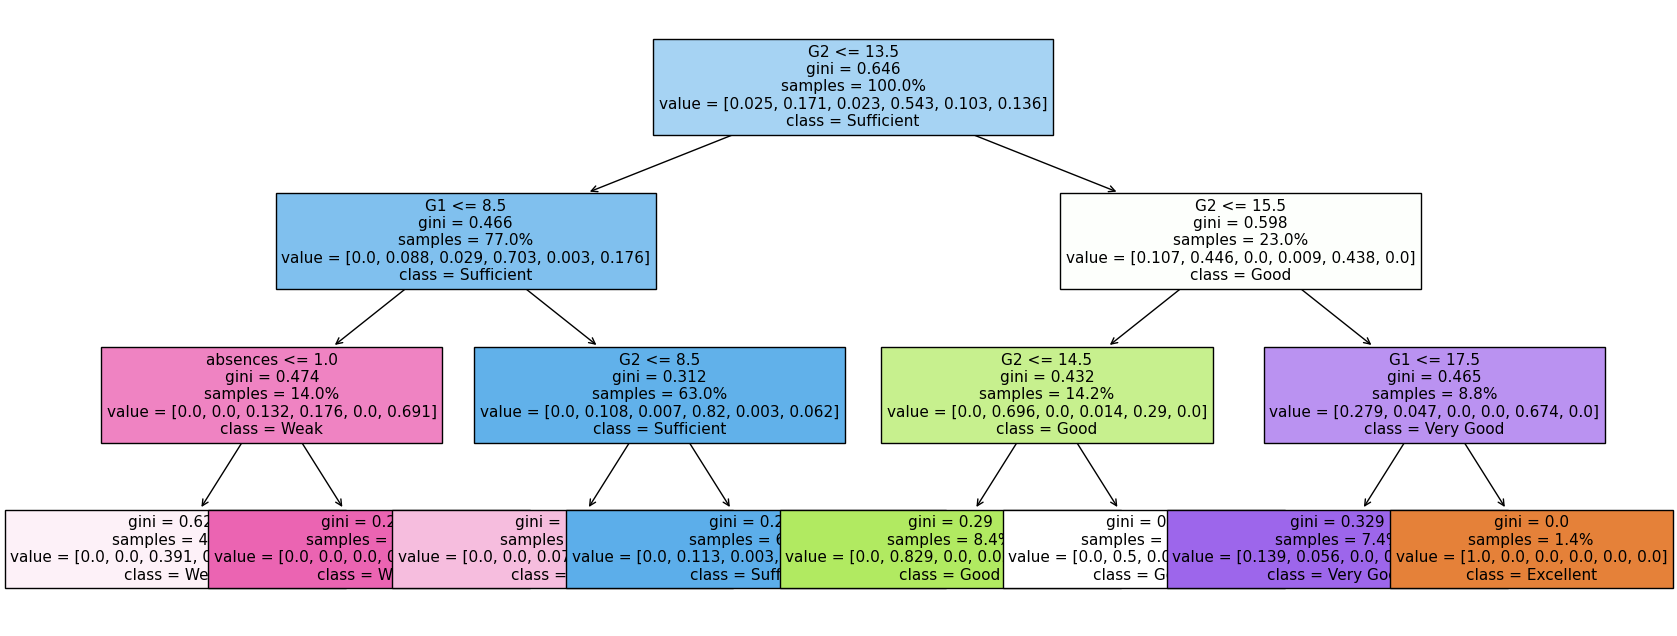

In [59]:
plt.figure(figsize = [20.0, 8.0]) # Setting the size of displayed Tree

plot_tree(class_tree, 
    feature_names = X.columns,
    class_names = ['Excellent', 'Good', 'Poor', 'Sufficient', 'Very Good', 'Weak'],
    filled = True,       
    proportion = True,
    rounded = False,
    fontsize = 11)

plt.show()

From this tree we can easily tell that G1 and G2 are the main predictor features for this model which are the 1st and 2nd period grades for the year before the final period exams G3, All the splits, except one, used these columns to progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of three levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  5,  0],
       [ 0, 18,  0, 11,  0,  0],
       [ 0,  0,  0,  1,  0,  4],
       [ 0,  2,  0, 78,  0, 11],
       [ 1,  3,  0,  0, 11,  0],
       [ 0,  0,  0,  5,  0, 13]], dtype=int64)

using cross validate to check precision_micro and fi_weighted

In [61]:
class_tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=24)

In [62]:
cross_validate_prec_f1 = cross_validate(
                         class_tree_gini, X, y, 
                         cv = 10, 
                         scoring = ("precision_micro", "f1_weighted"),
                         n_jobs = -1)

In [63]:
cross_validate_prec_mean = cross_validate_prec_f1["test_precision_micro"].mean()
cross_validate_prec_mean

0.7564663461538462

The precision micro is 0.75, still similar to our accuracy

In [64]:
cross_validate_f1_mean = cross_validate_prec_f1["test_f1_weighted"].mean()
cross_validate_f1_mean

0.7357168125722494

The fi_weighted is 0.73, still consistent with what we have been getting

**Using Gridsearch to get the best parameters for our model**

In [65]:
parameters = {
    "criterion": ["gini", "entropy"],
    "class_weight": [None, "balanced"],    
    "min_samples_split": [12, 30, 48],
    "max_depth": list(range(3, 7)),
    "min_samples_leaf": list(range(9, 19, 3))
    }

In [66]:
grid_recall = GridSearchCV(DecisionTreeClassifier(random_state = 24), 
                          param_grid = parameters, 
                          scoring = "recall_macro",
                          n_jobs = -1
                          )

In [67]:
grid_recall.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [9, 12, 15, 18],
                         'min_samples_split': [12, 30, 48]},
             scoring='recall_macro')

In [68]:
best_params = grid_recall.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 30}

In [69]:
grid_random_class_score = grid_recall.best_score_
grid_random_class_score

0.7337558124617758

We will use Randomforestclassifier to test the model as decision trees tend to overfit data

In [70]:
forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.76


Let's also check the Out of Bag Score. As a reminder, when Random Forest generates training subsets for every individual Tree, it leaves out some observations of the dataset, and if we activate the OOB Score then those observations will be used as test subsets.

In [71]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.73


Since the evaluation metrics of our Random Forest are similar to the scores of our Decision Tree, we can be confident about our results!

Because of their tendency to overfit the data, it's always considered good practice to double-check Trees with a Random Forest.

### Building a tree for regression

In [72]:
X = df.drop(["G3"], axis=1)
y = df["G3"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=24)

In [74]:
reg_tree = DecisionTreeRegressor(criterion = "squared_error", max_depth=3, random_state=24)

In [75]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=24)

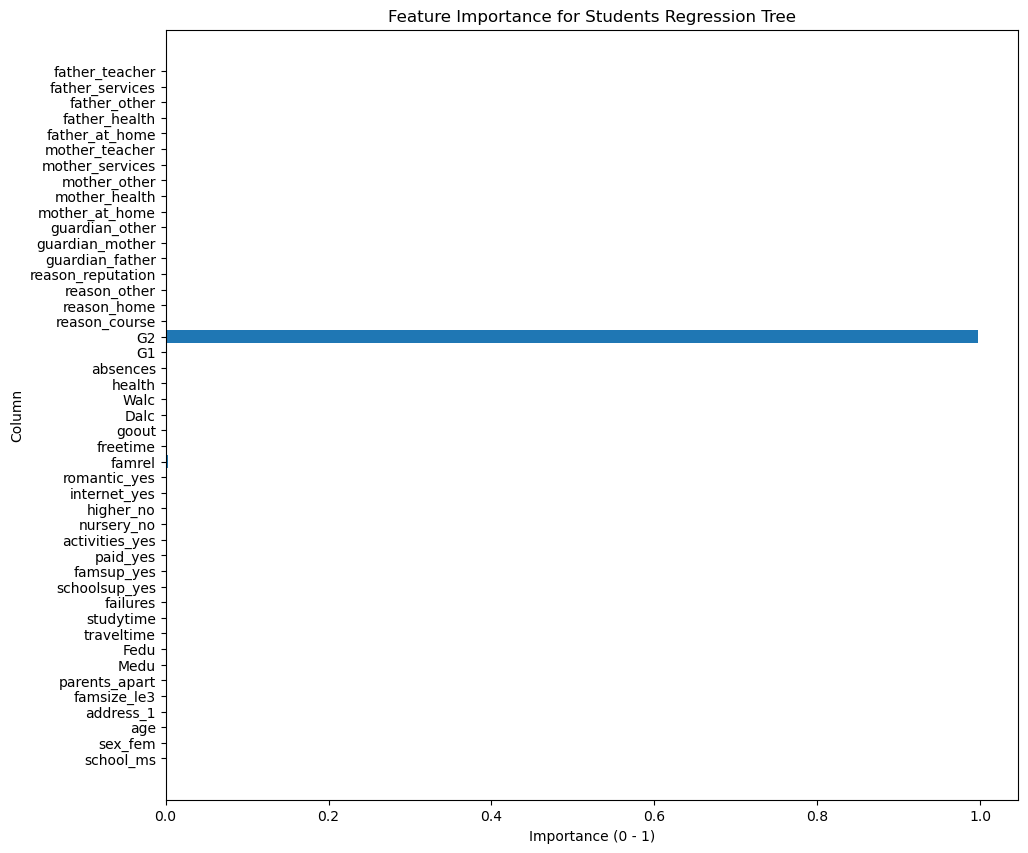

In [76]:
plt.rcParams["figure.figsize"] = [11.0, 10.0]
 
plt.barh(reg_tree.feature_names_in_, reg_tree.feature_importances_)
 
plt.xlabel("Importance (0 - 1)")
plt.ylabel("Column")
plt.title("Feature Importance for Students Regression Tree")
plt.show()

it is clear that G1 and G2 are the most important features for our model

In [77]:
y_pred = reg_tree.predict(X_test).round(0)

In [78]:
comparison = pd.DataFrame(data = {"y_test": y_test, "y_pred": y_pred})
comparison.sample(15, random_state = 14)

,y_test,y_pred
125,9,10.0
165,13,13.0
29,12,11.0
187,13,13.0
156,12,13.0
103,10,10.0
550,13,13.0
275,11,10.0
22,14,13.0
411,15,15.0


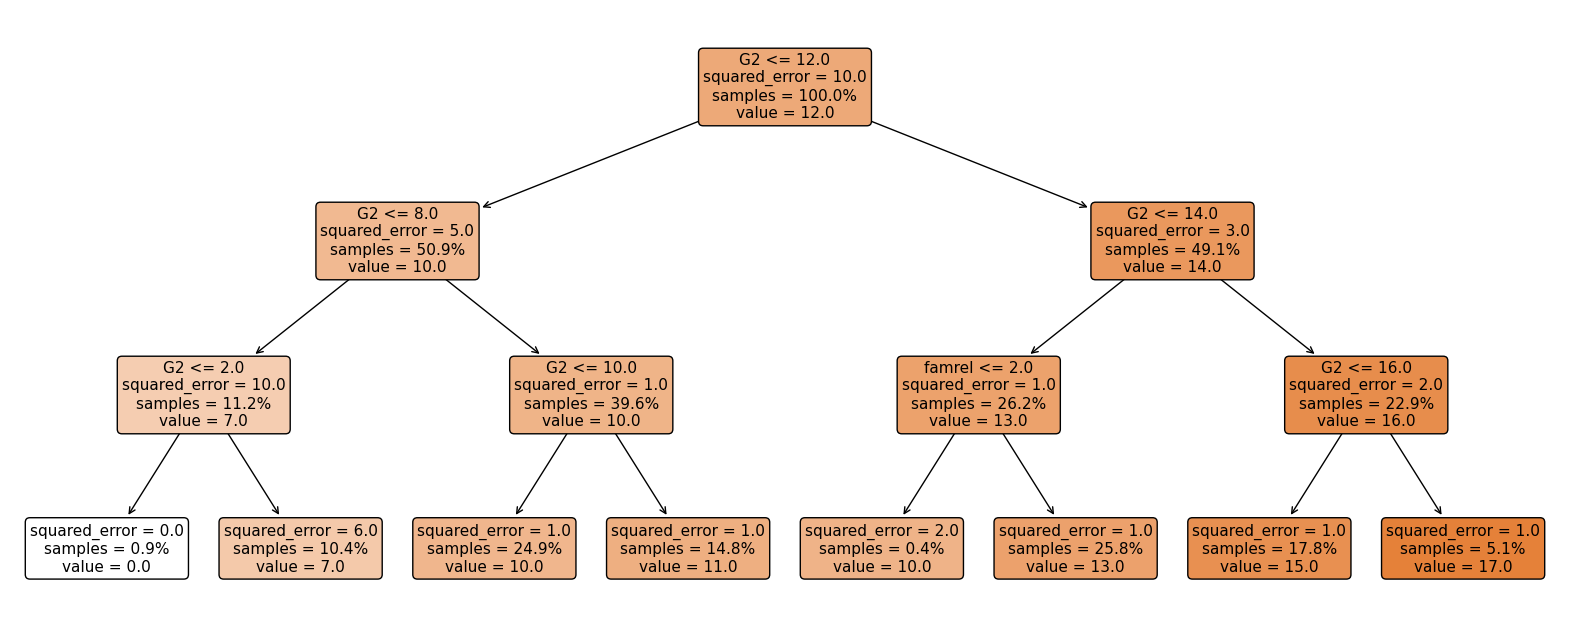

In [79]:
plt.figure(figsize = [20.0, 8.0]) # Setting the size of displayed Tree

plot_tree(reg_tree, 
    feature_names = X.columns, 
    filled = True,       
    proportion = True,
    precision = 0,
    rounded = True,
    fontsize = 11)

plt.show()

We can clearly see that even in the regression tree, G1 and G2 are the main features

In [80]:
# we will use cross_val_score to check our score of the model
reg_tree_crossval = (cross_val_score(reg_tree, X, y, cv = 5, n_jobs = -1))

In [81]:
crossval_mean = reg_tree_crossval.mean()

In [82]:
crossval_mean

0.7621761606059044

In [83]:
random_for_reg = RandomForestRegressor(max_depth = 3, n_jobs =-1, random_state = 32)

In [84]:
random_for_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=32)

In [85]:
random_regressor_score = random_for_reg.score(X_test, y_test)
random_regressor_score

0.8161460468082171

# Conclusion

* G1 and G2 are the best predictors for all models which makes sense as they are the previous period exams
* Our model perforemed ok with both Trees and Random forest
* Even after using GridSearch our accuracy score was still fairly consistent meaning that we have reach optimal accuracy